# Polynomial regression using numpy

## Libraries

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

## 1. Dataset

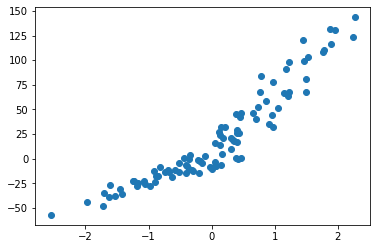

In [2]:
np.random.seed(0) # to reproduce the same Dataset each time
x, y = make_regression(n_samples=100, n_features=1, noise=10)
y = y + abs(y/2)
plt.scatter(x, y);

Important: check the dimensions of x and y . We fix the problem with np.reshape if the shape of x and y isn't the same

In [3]:
print(x.shape)
print(y.shape)

y = y.reshape(x.shape)
print(y.shape)

(100, 1)
(100,)
(100, 1)


Creation of the matrix X which contains the Bias column. For that, we glue against each other the vector  x² , x and a vector 1 (with np.ones) of dimension equal to that of x 

In [4]:
X = np.hstack((x**2 ,x, np.ones(x.shape)))
print(X.shape)

(100, 3)


creation of a parameter vector, initialized with random coefficients. This vector has dimension (3, 1). 

In [5]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta = np.random.randn(3, 1)
theta

array([[1.76405235],
       [0.40015721],
       [0.97873798]])

## 2. Linear Model

We implement a model F = X.θ , then we test the model to see if there is no bug (good practice requires). In addition, it allows to see what the initial model looks like, defined by the value of θ .

In [6]:
def model(X, theta):
    return X.dot(theta)

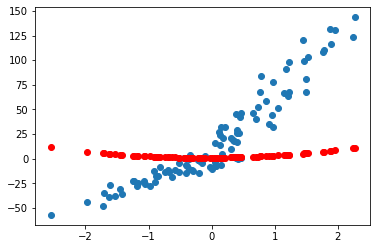

In [7]:
plt.scatter(x, y)
plt.scatter(x, model(X, theta), c='r');

## 3. Cost/Loss function : Mean Squared Error (MSE)

We measure the errors of the model on the Dataset X, y by implementing MSE 
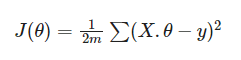



In [8]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [9]:
cost_function(X, y, theta)

1181.5228812416951

## 4. Gradients and Gradient Descent

We implement the gradient formula for the MSE :
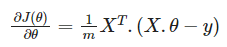
Then we use this function in the gradient descent:
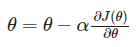

In [10]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [11]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # creation of a storage table to record the evolution of the Cost of the model
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) 
        cost_history[i] = cost_function(X, y, theta) 
        
    return theta , cost_history

## 5. Training phase

In [12]:
n_iterations = 1000
learning_rate = 0.01

theta_final , cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [13]:
theta_final

array([[ 8.6007094 ],
       [42.23119849],
       [ 8.18156861]])

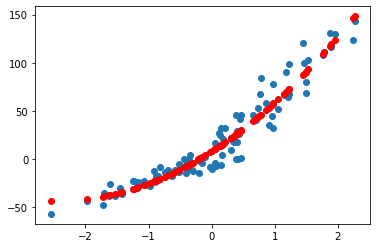

In [14]:
# creation of a prediction vector which contains the predictions of our final model
predictions = model(X, theta_final)

# Displays the prediction results (in red) compared to our Dataset (in blue)
plt.scatter(x, y)
plt.scatter(x, predictions, c='r');

To check if our Gradient Descent algorithm worked well, we observe the evolution of the cost function through the iterations. We are supposed to obtain a curve which decreases with each iteration until it stagnates at a minimum level (close to zero). If the curve does not follow this pattern, then the learning_rate step may be too high, it is necessary to take a lower step.

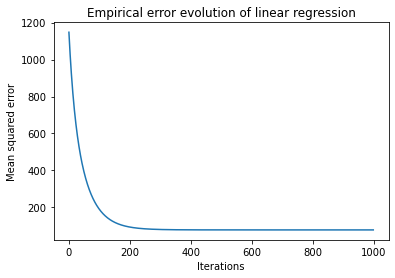

In [15]:
plt.title('Empirical error evolution of linear regression')
plt.xlabel('Iterations')
plt.ylabel('Mean squared error')
plt.plot(range(n_iterations), cost_history)
plt.show()

## 7. Final evaluation


To evaluate the real performance of our model with a popular metric (for your boss, client, or your colleagues) we can use the coefficient of determination, also known as . It comes from the method of least squares. The closer the result is to 1, the better your model is.

In [16]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [17]:
coef_determination(y, predictions)

0.9287186491853539